***I - Import minimal dependencies***

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

***Répartir les données***

In [52]:
from sklearn.model_selection import train_test_split #split des données

***Ajouter des dépences liées aux imputing-scaling et pipelines***

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector

***Ajouter le modèle***

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

***Ajouter l'évaluation du modèle***

In [95]:
from sklearn.metrics import accuracy_score, log_loss

***II-Import dataset***

In [3]:
df=pd.read_csv("titanic_dataset.csv")

***2.1 - Retraitements***

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print((891-714)/891)

0.19865319865319866


In [7]:
df['Age'].isnull().sum()

177

In [8]:
df['Fare'].isnull().sum()

0

In [9]:
df['Cabin'].isnull().sum()

687

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Conclusion de cette première analyse : je n'ai pas le même nombre de données par colonne. Certaines séries sont numériques ou bien encodables, tandis que d'autres ne le sont pas : le passenger Id, le name, le ticket, la cabin. Attention à ne pas faire un dropna sur la cabine le risque serait de perdre des données***

***2.2 Réorganiser les données***

In [12]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [13]:
numerical_data=df[[
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare']]
numerical_data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


***2.3 Retraiter les données par exemple les catégories numérisables***

In [14]:
categorical_data=df[['Sex','Embarked']]
categorical_data

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [15]:
df["Sex"] = df["Sex"].replace({"male": 1, "female": 2})

/tmp/ipykernel_468790/2767913536.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"male": 1, "female": 2})


In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


***comment lire la colonne Embarked***

In [17]:
df.groupby('Embarked')['Survived'].count().to_frame()

,Survived
Embarked,
C,168
Q,77
S,644


In [18]:
df.groupby('Embarked')['Survived'].mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [19]:
df.groupby('Survived')['Embarked'].count().to_frame()

,Embarked
Survived,
0,549
1,340


In [20]:
#compter les valeurs non nulles
df.groupby('Embarked')['Survived'].count().to_frame()

,Survived
Embarked,
C,168
Q,77
S,644


In [21]:
#compter les valeurs existantes comptabilisées comme 0 et 1
df.groupby('Embarked')['Survived'].value_counts().to_frame()


count
Embarked Survived       
C        1            93
         0            75
Q        0            47
         1            30
S        0           427
         1           217

In [22]:
numerical_data=df[[
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
'Sex']]
numerical_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,1,3,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,2
888,0,3,NaN,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,1


In [23]:
df['Fare']=df['Fare'].round()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.0,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.0,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,8.0,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.0,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.0,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0,C148,C


In [24]:
numerical_data=df[[
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
'Sex']]
numerical_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22.0,1,0,7.0,1
1,1,1,38.0,1,0,71.0,2
2,1,3,26.0,0,0,8.0,2
3,1,1,35.0,1,0,53.0,2
4,0,3,35.0,0,0,8.0,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0,1
887,1,1,19.0,0,0,30.0,2
888,0,3,NaN,1,2,23.0,2
889,1,1,26.0,0,0,30.0,1


***III - Analyse de la distribution notamment de la colonne age***

<Axes: >

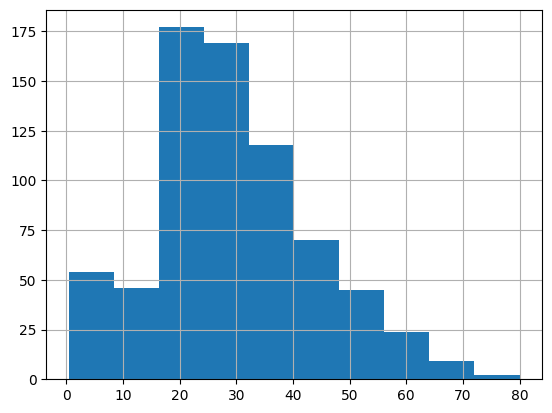

In [25]:
df['Age'].hist()

In [26]:
# df['Age'].plot(kind='hist')

In [27]:
df['tranches_dage']=''

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tranches_dage
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.0,NaN,S,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.0,C85,C,
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,8.0,NaN,S,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.0,C123,S,
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0,NaN,S,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0,NaN,S,
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0,B42,S,
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.0,NaN,S,
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0,C148,C,


In [29]:
df['Age'].skew()

0.38910778230082704

In [30]:
df['Age']=df['Age'].fillna(28)

In [31]:
print(df['Age'].isnull().sum())  # avant remplissage



0


In [32]:
df['Age'].skew()

0.5102446555756495

<Axes: >

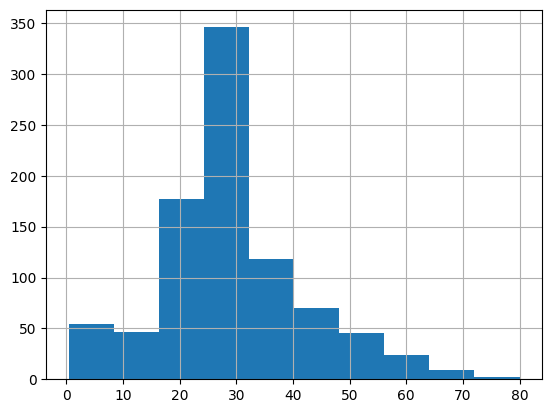

In [33]:
df['Age'].hist()

In [34]:
df['Age'].isna().value_counts()

Age
False    891
Name: count, dtype: int64

In [35]:
tranches = []
for age in df['Age']:
    if age <= 17:
        tranches.append('<=17')
    elif age > 55:
        tranches.append('>55')
    else:
        tranches.append('18-55')

df['tranche_dage'] = tranches

In [36]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tranches_dage,tranche_dage
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.0,NaN,S,,18-55
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.0,C85,C,,18-55
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,8.0,NaN,S,,18-55
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.0,C123,S,,18-55
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0,NaN,S,,18-55


In [37]:
test=df.groupby('tranche_dage')['Sex'].value_counts().to_frame()
test

count
tranche_dage Sex       
18-55        1      488
             2      250
<=17         1       58
             2       55
>55          1       31
             2        9

In [38]:
df['tranche_dage'] = pd.Categorical(df['tranche_dage'],
                                    categories=['<=17', '18-55', '>55'],
                                    ordered=True)

test= df.groupby('tranche_dage')['Sex'].value_counts().to_frame()


/tmp/ipykernel_468790/796350518.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test= df.groupby('tranche_dage')['Sex'].value_counts().to_frame()


In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tranches_dage,tranche_dage
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.0,NaN,S,,18-55
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.0,C85,C,,18-55
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,8.0,NaN,S,,18-55
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.0,C123,S,,18-55
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0,NaN,S,,18-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0,NaN,S,,18-55
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0,B42,S,,18-55
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,28.0,1,2,W./C. 6607,23.0,NaN,S,,18-55
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0,C148,C,,18-55


In [40]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'tranches_dage',
 'tranche_dage']

In [41]:
df.drop('tranches_dage', axis=1, inplace=True)

axis=1 indique qu’on supprime une colonne (et non une ligne).
utiliser inplace=True pour modifier le DataFrame directement :

***IV - modele de régression linéaire : recherche de corrélations***

In [42]:
#rappel des étapes : 
#les dépendencies, du imput et scale + du modèle
#les retraitements automatisés : le split préalable au modèle, un fit_transform et fit
#les variables en particulier la target, le modèle instancié
#l'entrainement du modèle
#le predict
#l'évaluation du modèle

In [43]:
# from sklearn.impute import SimpleImputer

In [44]:
# from sklearn.preprocessing import StandardScaler #robust is robust to outliers here wedon't have any ; max and min not necessary. Standard is ok

***note:déjà importés dans les dépendencies***

In [45]:
# get_feature_names_out revoir : permet de supprimer les entêtes de colonnes

In [46]:
num_preproc=Pipeline([
("numerical_imputer", SimpleImputer(strategy="mean")),
("numerical_scaler", StandardScaler())])

In [116]:
cat_preproc=Pipeline([
("categorical_imputer", SimpleImputer(strategy="constant",fill_value="Missing")),
("categorical_OHE", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

***note : vérifier le Kernel pbl de chargement du dataset et par conséquent du calcul***

***colonne transformer***

In [117]:
print(cat_preproc)

Pipeline(steps=[('categorical_imputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('categorical_OHE',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    int64   
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  tranche_dage  891 non-null    category
dtypes: category(1), float64(2), int64(6), object(4)
memory usage: 84.7+ KB


***X et y doivent contenir des données, pas des chaînes !Partir du DataFrame (ex : df) et séparer les features et la target***

In [87]:
X = df.drop(columns="Pclass")
y = df["Pclass"]


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
preproc = make_column_transformer(
    (num_preproc, make_column_selector(dtype_include=["int64","float64"])),
    (cat_preproc, make_column_selector(dtype_include=["object"]))
)
preproc

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('numerical_imputer',
                                                  SimpleImputer()),
                                                 ('numerical_scaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ec610800>),
                                ('pipeline-2',
                                 Pipeline(steps=[('categorical_imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('categorical_OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ec610170>)])

In [90]:
preproc.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('numerical_imputer',
                                                  SimpleImputer()),
                                                 ('numerical_scaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ec610800>),
                                ('pipeline-2',
                                 Pipeline(steps=[('categorical_imputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('categorical_OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ec610170>)])

In [91]:
X_train_pre=preproc.transform(X_train)
X_test_pre=preproc.transform(X_test)

***la cible ne se transforme jamais, seulement les features.***

In [93]:
model = LogisticRegression()
model.fit(X_train_pre, y_train)

LogisticRegression()

In [113]:
# les colonnes que je conserve ['Survived','Sex','Age','SibSp','Parch','Fare']

In [100]:
y_pre=model.predict(X_test_pre)
y_pre.mean()

2.3656716417910446

In [109]:
y_proba=model.predict_proba(X_test_pre)
y_proba[:,0].mean()

0.25961074037601595

In [110]:
y_proba[:,1].mean()

0.19277647485134597

In [111]:
y_proba[:,2].mean()

0.5476127847726381

In [119]:
# cat_columns = cat_preproc.named_steps['categorical_OHE'].get_feature_names_out()
# print(cat_columns)

In [120]:
acc = accuracy_score(y_test, y_pre)
loss = log_loss(y_test, y_proba)

print("Accuracy:", acc)
print("Log Loss:", loss)

Accuracy: 0.8544776119402985
Log Loss: 0.42564688121770783
